In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

## Basic Unbiased Estimators

### Sample Mean

$\bar{X_i} = \frac{1}{n}\sum_j^nX_{i,j}$


### Expectation of Sample Mean 

$E[\bar{X_i}] = \frac{1}{n}E[\sum_j^nX_{i,j}] = E[X_i]$



In [16]:
X = np.random.normal(0,1,10000)
X_bar = []
sample_var = []

for i in range(10000):
    inx = np.random.randint(10000, size=100)
    X_bar.append(np.mean(X[inx]))
    sample_var.append(statistics.variance(X[inx]))

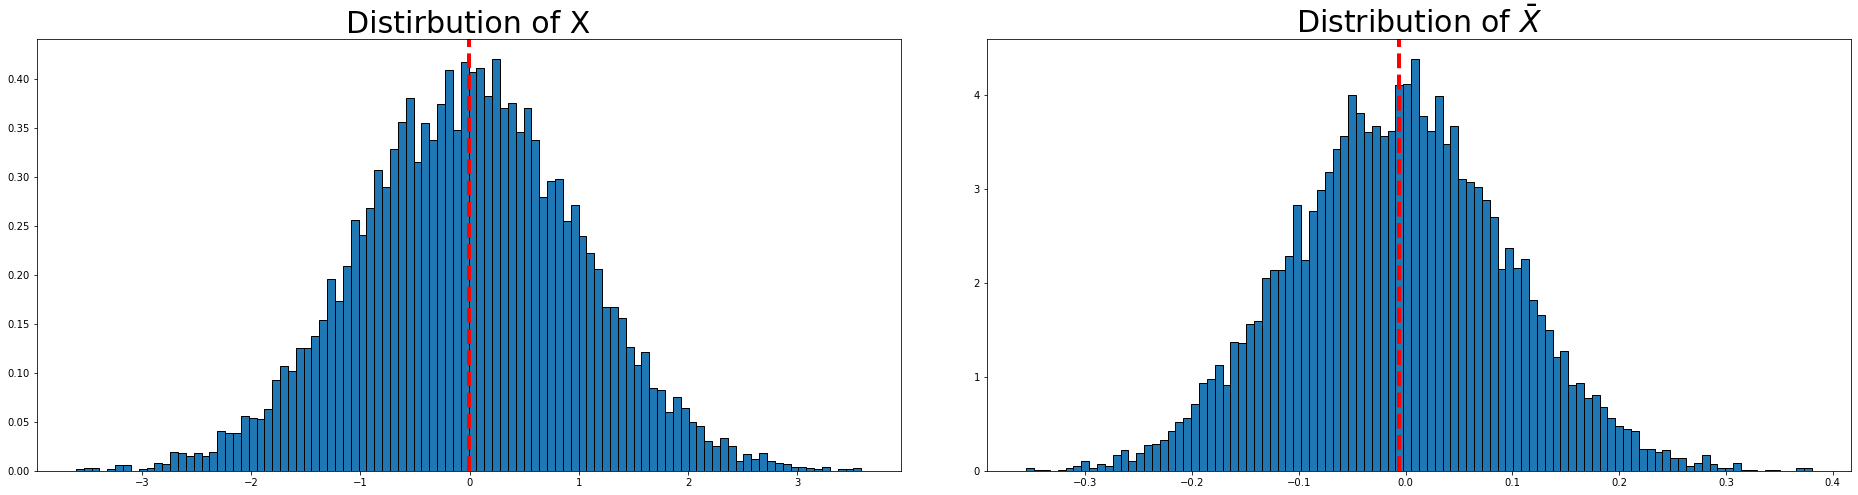

In [17]:
fig = plt.figure(figsize=(12,6))

ax_0 = fig.add_axes([0,0,1,1])
ax_1 = fig.add_axes([1.1,0,1,1])

ax_0.hist(X, bins=100, ec="black", density=True)
ax_0.set_title("Distirbution of X", fontsize=30)
ax_1.hist(X_bar, bins=100, ec="black", density=True)
ax_1.set_title(r"Distribution of $\bar{X}$", fontsize=30)

ax_0.axvline(np.mean(X), color='red', linestyle="--",linewidth=4)
ax_1.axvline(np.mean(X_bar), color='red', linestyle="--",linewidth=4)


plt.show()

### Sample Variance

$S_{x,i}^2 = \frac{1}{n-1}\sum_j^n(X_{i,j}-\bar{X_i})^2$


### Expectation of Sample Variance

$E[S_{x,i}^2] = \frac{1}{n-1}E[\sum_j^n(X_{i,j}-\bar{X_i})^2]$

$= \frac{1}{n-1}E[\sum_j^n(X_{i,j}^2-2\bar{X_{i}}X_{i,j}+\bar{X_i}^2)]$

$= \frac{1}{n-1}E[\sum_j^nX_{i,j}^2-2\bar{X_{i}}\sum_j^nX_{i,j}+\sum_j^n\bar{X_i}^2]$

$= \frac{1}{n-1}E[\sum_j^nX_{i,j}^2-2n\bar{X_{i}}^2+n\bar{X_i}^2]$

$= \frac{1}{n-1}E[\sum_j^nX_{i,j}^2-n\bar{X_i}^2]$

$= \frac{1}{n-1}(E[\sum_j^nX_{i,j}^2]-nE[\bar{X_i}^2])$

$= \frac{1}{n-1}(nE[X_{i,j}^2]-nE[\bar{X_i}^2])$


$E[X_{i,j}^2] = Var(X_i) + E[X_i]^2$

$E[\bar{X_i}^2] = Var(\bar{X_i}) + E[\bar{X_i}]^2$

$E[\bar{X_i}^2] = \frac{Var(X_i)}{n}+E[\bar{X_i}]^2$

$= \frac{n}{n-1}(E[X_{i,j}^2]-E[\bar{X_i}^2])$

$= \frac{n}{n-1}(Var(X_i) + E[X_i]^2 - \frac{Var(X_i)}{n}-E[\bar{X_i}]^2)$

$= \frac{n}{n-1}(Var(X_i) + \mu_x^2 - \frac{Var(X_i)}{n}-\mu_x^2)$

$= \frac{n}{n-1}(Var(X_i) - \frac{Var(X_i)}{n})$

$= \frac{1}{n-1}(n \cdot Var(X_i) - Var(X_i))$

$= \frac{1}{n-1} \cdot Var(X_i) \cdot (n-1)$

$= Var(X_i)$

#### This is the variance of X.

In [20]:
statistics.pvariance(X)

1.003197164386889

#### This is the expectation of sample variances.

In [18]:
np.mean(sample_var)

1.0044046446869135

## Properties of Expectation

$E[a+b] = E[a] + E[b]$

If and only if a and b are independent.

In other words, 

$E[\sum_i^nX_{i,j}]=E[X_{1,j}+X_{2,j}+...+X_{n,j}]$

$E[X_{1,j}]+E[X_{2,j}]+...+E[X_{n,j}]=n \cdot E[X_j]$

Let's try this example: 

$E[\sum_{i}^3X_{i,j}] = E[X_{1,j} + X_{2,j} + X_{3,j}]$

$= 3 \cdot E[X_j]$

In [23]:
# First example where X_j takes mean zero. 

X_1 = np.random.normal(0,1,10000)
X_2 = np.random.normal(0,1,10000)
X_3 = np.random.normal(0,1,10000)

sigma_X = X_1 + X_2 + X_3

np.mean(sigma_X)

-0.010281481998706762

In [26]:
# Second example where X_j takes mean 3. 

X_1 = np.random.normal(3,1,10000)
X_2 = np.random.normal(3,1,10000)
X_3 = np.random.normal(3,1,10000)

sigma_X = X_1 + X_2 + X_3

np.mean(sigma_X)

8.987106521630093

## Properties of Varaince (variance is also an expectation)

$Var[a+b] = Var[a] + Var[b] + 2 \cdot Cov(a,b)$

But if a and b are independent, then the $Cov(a,b)=0$

But $Cov(a,b) = 0$ doesn't mean that a and b are independent.

**Therefore,**

$Var[a+b] = Var[a] + Var[b]$

if and only if a and b are independent.

**Mathematical proof:** 

$Var(a + b) = E[(a+b)^2] - E[a+b]^2$

$= E[a^2 + 2ab + b^2] - E[a+b]^2$

$= E[a^2] + 2E[ab] + E[b^2] - (E[a]+E[b])^2$

$= E[a^2] + 2E[ab] + E[b^2] - (E[a]^2 + 2E[a]E[b] + E[b]^2)$

$= E[a^2] - E[a]^2 + E[b^2] - E[b]^2 + 2E[ab] - 2E[a]E[b]$

$= Var(a) + Var(b) + 2Cov(a,b)$

**Conversely**

$Var(a-b) = Var(a) + Var(b) - 2Cov(a,b)$

In [30]:
print("Variance of X_1 is", statistics.pvariance(X_1))
print("Variance of X_2 is", statistics.pvariance(X_2))

Variance of X_1 is 0.9695551115718865
Variance of X_2 is 0.9976613701938325


In [33]:
print("Variance of X_1 + Variance of X_2 is", statistics.pvariance(X_1) + statistics.pvariance(X_2))

Variance of X_1 + Variance of X_2 is 1.967216481765719


In [34]:
print("Variance of (X_1 + X_2) is ",statistics.pvariance(X_1+X_2))

Variance of (X_1 + X_2) is  1.9848871633317517


## Additional Stuff 

### Number 1

$COV(X_i,Y_i) = E[(X_i - E[X_i])(Y_i - E[Y_i])]$

$ = E[X_iY_i - X_i\mu_y - \mu_xY_i + \mu_x\mu_y]$

$ = E[X_iY_i] - \mu_x\mu_y - \mu_x\mu_y + \mu_x\mu_y$

$ = E[X_iY_i] - \mu_x\mu_y$

**Therefore** 

$E[X_iY_i] = COV(X,Y) + \mu_x\mu_y$

**But if X and Y are independent, then $Cov(X,Y) = 0$. Therefore, $E[X_iY_i] = E[X_i]E[Y_i] = \mu_x\mu_y$**


### Number 2


$COV(\bar{X},\bar{Y}) = E[(\bar{X_i} - E[\bar{X_i}])(\bar{Y_i} - E[\bar{Y_i}])]$

$ = E[\bar{X_i}\bar{Y_i}] - \mu_x\mu_y$ 

**Therefore** 

$E[\bar{X_i}\bar{Y_i}] = COV(\bar{X},\bar{Y}) + \mu_x\mu_y$


### Number 3 


$VAR(\bar{X_i}) = \frac{Var(X_i)}{N}$

**Proof:**

$VAR(\bar{X_i}) = E[(\bar{X_i}-E[\bar{X_i}])^2]$

$= E[(\frac{1}{N}\sum_j^nX_{i,j}-\frac{1}{N}E[\sum_j^nX_{i,j}])^2]$

$= \frac{1}{N^2} \cdot E[(\sum_j^nX_{i,j}-E[\sum_j^nX_{i,j}])^2]$

$= \frac{1}{N^2} \cdot Var(\sum_j^nX_{i,j})$

**Because $X_j$ are independent from each other, the covariance terms goes to zero.**

$= \frac{1}{N^2} \cdot N \cdot Var(X_i)$

**Therefore** 

$= \frac{1}{N} \cdot Var(X_i)$

**But more simply, we can do something like this.** 

$VAR(\bar{X_i}) = Var(\frac{1}{N}\sum_j^nX_{i,j})$

$= \frac{1}{N^2} \cdot Var(\sum_j^nX_{i,j})$

$= \frac{1}{N^2} \cdot N \cdot Var(X_i)$

$= \frac{1}{N} \cdot Var(X_i)$


### Number 4

When X and Y are independent,

$Var(X \cdot Y) = \sigma_x^2\sigma_y^2 + \mu_y^2\sigma_x^2 + \mu_x^2\sigma_y^2$

**Proof**

$Var(XY) = E[(XY)^2]-E[XY]^2$

$= E[X^2Y^2] - E[X]^2E[Y]^2$

If X and Y are independent, then $E[X^2Y^2] = E[X^2]E[Y^2]$

$= E[X^2]E[Y^2] - E[X]^2E[Y]^2$

$= (Var(X)+\mu_x^2)(Var(Y)+\mu_y^2) - \mu_x^2\mu_y^2$

$= (\sigma_x^2\sigma_y^2 +\sigma_x^2\mu_y^2 + \mu_x^2\sigma_y^2 + \mu_x^2\mu_y^2) - \mu_x^2\mu_y^2$

$= \sigma_x^2\sigma_y^2 +\sigma_x^2\mu_y^2 + \mu_x^2\sigma_y^2$

If X and Y are dependent, then $E[X^2Y^2] = Cov(X^2,Y^2) + E[X^2]E[Y^2]$

Usually, we used the formula $E[XY] = Cov(X,Y) + E[X]E[Y]$ When X and Y are dependent.

**Therefore** 


When X and Y are dependent, then 

$Var(X \cdot Y) = Cov(X^2,Y^2) + \sigma_x^2\sigma_y^2 + \mu_y^2\sigma_x^2 + \mu_x^2\sigma_y^2$
